In [1]:
import sys

sys.path.insert(0, '..\src')
import matplotlib.pyplot as plt
import numpy as np

import satlas2

{'amplitude': 5+/-0 (inf max, -inf min, vary=True, correl={}),
 'halflife': 3+/-0 (inf max, -inf min, vary=True, correl={})}

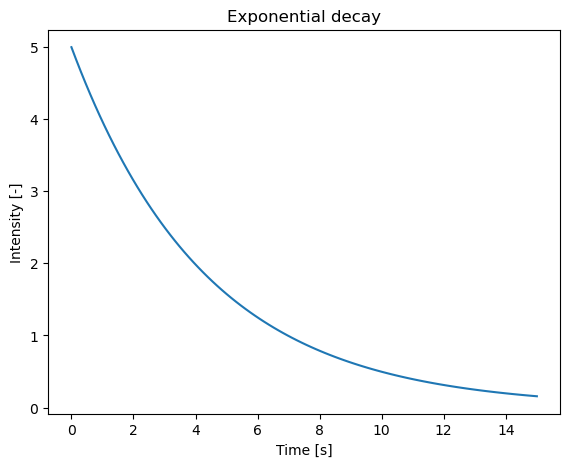

In [2]:
amplitude = 5
halflife = 3
model = satlas2.ExponentialDecay(amplitude, halflife)

x = np.linspace(0, 5*halflife, 100)
y = model.f(x)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, y)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Intensity [-]')
ax.set_title('Exponential decay')
model.params

{'p2': 1+/-0 (inf max, -inf min, vary=True, correl={}),
 'p1': 0+/-0 (inf max, -inf min, vary=True, correl={}),
 'p0': 5+/-0 (inf max, -inf min, vary=True, correl={})}

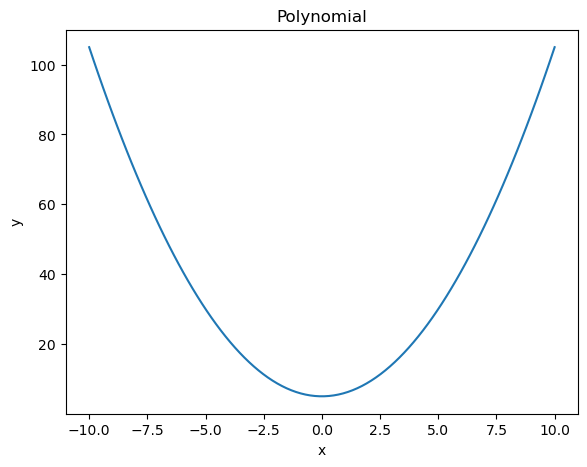

In [3]:
coefficients = [1, 0, 5] # Polynomial coefficients, starting with highest order
model = satlas2.Polynomial(coefficients)

x = np.linspace(-10, 10, 100)
y = model.f(x)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Polynomial')
model.params

{'value2': 5+/-0 (inf max, 0 min, vary=True, correl={}),
 'value1': 0+/-0 (inf max, 0 min, vary=True, correl={}),
 'value0': 1+/-0 (inf max, 0 min, vary=True, correl={})}

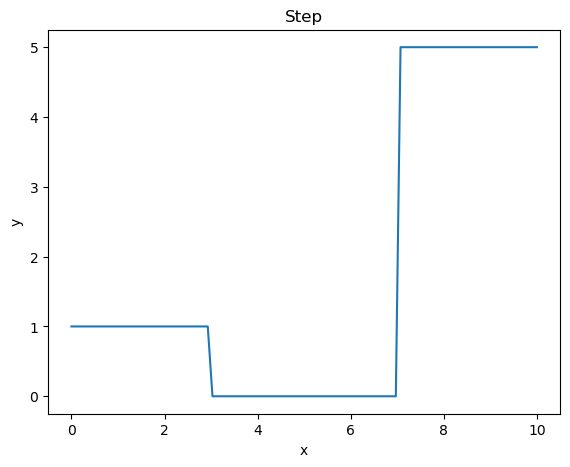

In [4]:
values = [1, 0, 5]
boundaries = [3, 7]
model = satlas2.Step(values, boundaries)

x = np.linspace(0, 10, 100)
y = model.f(x)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Step')
model.params

{'A': 7+/-0 (inf max, 0 min, vary=True, correl={}),
 'mu': 20+/-0 (inf max, -inf min, vary=True, correl={}),
 'FWHMG': 10+/-0 (inf max, 0 min, vary=True, correl={}),
 'FWHML': 15+/-0 (inf max, 0 min, vary=True, correl={})}

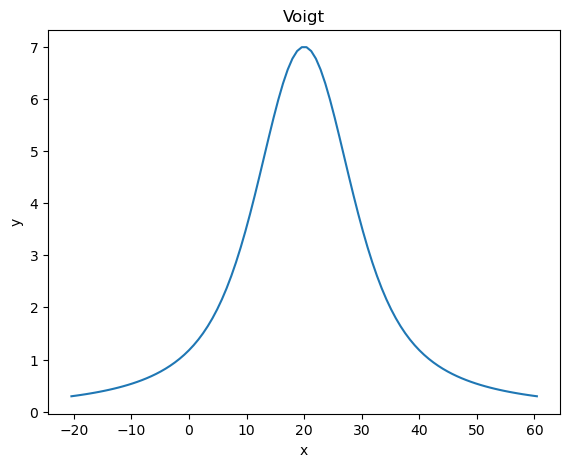

In [7]:
amplitude = 7
mu = 20
FWHMG = 10
FWHML = 15
model = satlas2.Voigt(amplitude, mu, FWHMG, FWHML)
fwhm, _ = model.calculateFWHM()

x = np.linspace(mu-2*fwhm, mu+2*fwhm, 100)
y = model.f(x)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voigt')
model.params

{'A': 7+/-0 (inf max, 0 min, vary=True, correl={}),
 'mu': 20+/-0 (inf max, -inf min, vary=True, correl={}),
 'FWHMG': 10+/-0 (inf max, 0 min, vary=True, correl={}),
 'FWHML': 15+/-0 (inf max, 0 min, vary=True, correl={}),
 'Skew': 3+/-0 (inf max, -inf min, vary=True, correl={})}

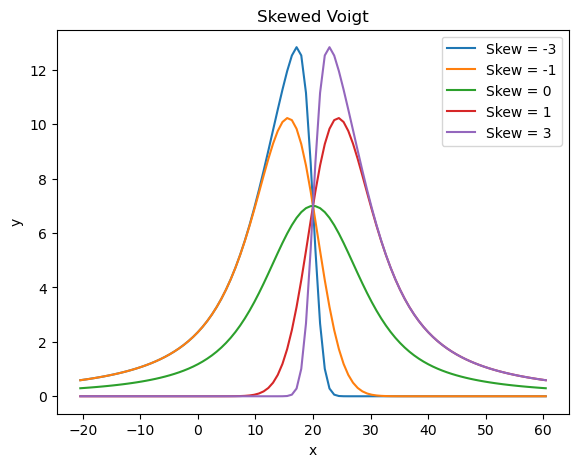

In [10]:
amplitude = 7
mu = 20
FWHMG = 10
FWHML = 15
skew = [-3, -1, 0, 1, 3]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

x = np.linspace(mu-2*fwhm, mu+2*fwhm, 100)
for s in skew:
    model = satlas2.SkewedVoigt(amplitude, mu, FWHMG, FWHML, s)
    y = model.f(x)
    ax.plot(x, y, label='Skew = {}'.format(s))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Skewed Voigt')
ax.legend(loc=0)
model.params